In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('../datasets/pulsar-stars/pulsar_stars.csv')

In [4]:
data.columns = [col.strip() for col in data.columns]

In [5]:
NOMBRES_COLUMNAS = {
    'Mean of the integrated profile' : 'media del perfil integrado',
    'Standard deviation of the integrated profile' : 'desviacion estandar del perfil integrado',
    'Excess kurtosis of the integrated profile' : 'exceso de curtosis del perfil integrado',
    'Skewness of the integrated profile' : 'sesgo del perfil integrado',
    'Mean of the DM-SNR curve' : 'media de la curva DM-SNR',
    'Standard deviation of the DM-SNR curve' : 'desviacion estandar de la curva DM-SNR',
    'Excess kurtosis of the DM-SNR curve' : 'exceso de curtosis de la curva DM-SNR',
    'Skewness of the DM-SNR curve' : 'sesgo de la curva DM-SNR',
    'target_class' : 'target_class'
}
data.rename(columns=NOMBRES_COLUMNAS, inplace=True)

In [6]:
data.dtypes

media del perfil integrado                  float64
desviacion estandar del perfil integrado    float64
exceso de curtosis del perfil integrado     float64
sesgo del perfil integrado                  float64
media de la curva DM-SNR                    float64
desviacion estandar de la curva DM-SNR      float64
exceso de curtosis de la curva DM-SNR       float64
sesgo de la curva DM-SNR                    float64
target_class                                  int64
dtype: object

In [7]:
train , test = train_test_split(data,test_size = .3,random_state = 123)

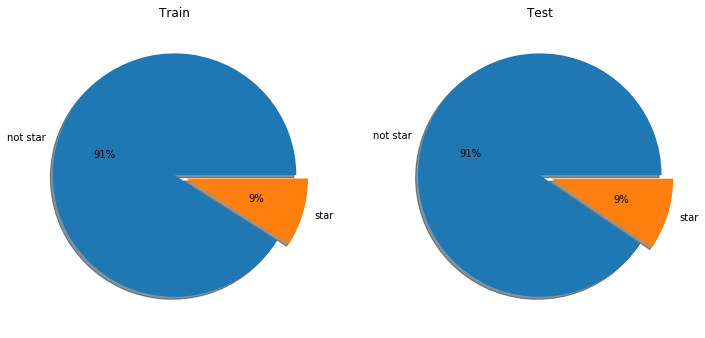

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(121)
train["target_class"].value_counts().plot.pie(labels = ["not star","star"],
                                              autopct = "%1.0f%%",
                                              shadow = True,explode=[0,.1])
plt.title("Train")
plt.ylabel("")
plt.subplot(122)
test["target_class"].value_counts().plot.pie(labels = ["not star","star"],
                                             autopct = "%1.0f%%",
                                             shadow = True,explode=[0,.1])
plt.title("Test")
plt.ylabel("")
plt.show()

In [9]:
#Seperating Predictor and target variables
train_X = train[[x for x in train.columns if x not in ["target_class"]]]
train_Y = train[["target_class"]]
test_X  = test[[x for x in test.columns if x not in ["target_class"]]]
test_Y  = test[["target_class"]]

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

accuracy_score : 0.9763500931098696

classification report :
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4860
           1       0.93      0.82      0.87       510

   micro avg       0.98      0.98      0.98      5370
   macro avg       0.95      0.90      0.93      5370
weighted avg       0.98      0.98      0.98      5370



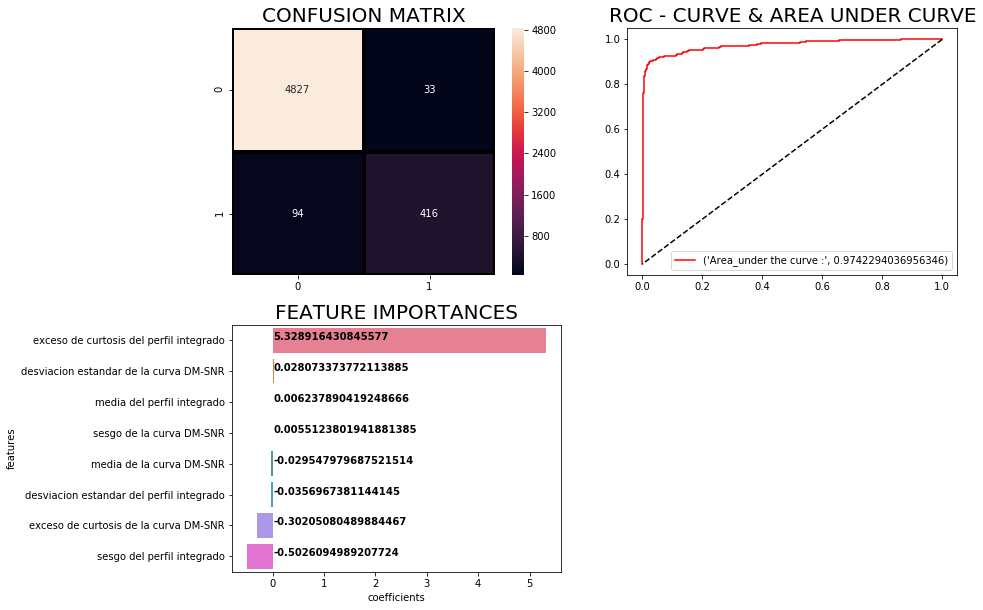

In [12]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
model(log,train_X,train_Y,test_X,test_Y,"coef")